# Catboost Regression No. 1

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np

In [2]:
# Read the train data.
data_train = pd.read_csv('train.csv')

In [3]:
# Read the first lines of the train data.
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
# Print the shape of the train data.
data_train.shape

(188318, 132)

In [5]:
# Count the number of null values.
data_train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [6]:
# Calculate the sum of the null values.
data_train.isnull().sum().sum()

0

In [7]:
# Show information about the train data.
data_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [8]:
# Show additional information about the train data.
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [9]:
# Read the test data.
data_test = pd.read_csv('test.csv')

In [10]:
# Read the first lines of the test data.
data_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [11]:
# Print the shape of the test data.
data_test.shape

(125546, 131)

In [12]:
# Count the number of null values.
data_test.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
Length: 131, dtype: int64

In [13]:
# Calculate the sum of the null values.
data_test.isnull().sum().sum()

0

In [14]:
# Show information about the test data.
data_test.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [15]:
# Show additional information about the test data.
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [16]:
# Data_train has an extra column, namely 'loss' column.
# This is the column which contains the target values.
# Let's look at it.
data_train.iloc[:, -1]

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

In [17]:
# For data visualization, import matplotlib and seaborn.
import matplotlib.pyplot as plt
import seaborn as sns

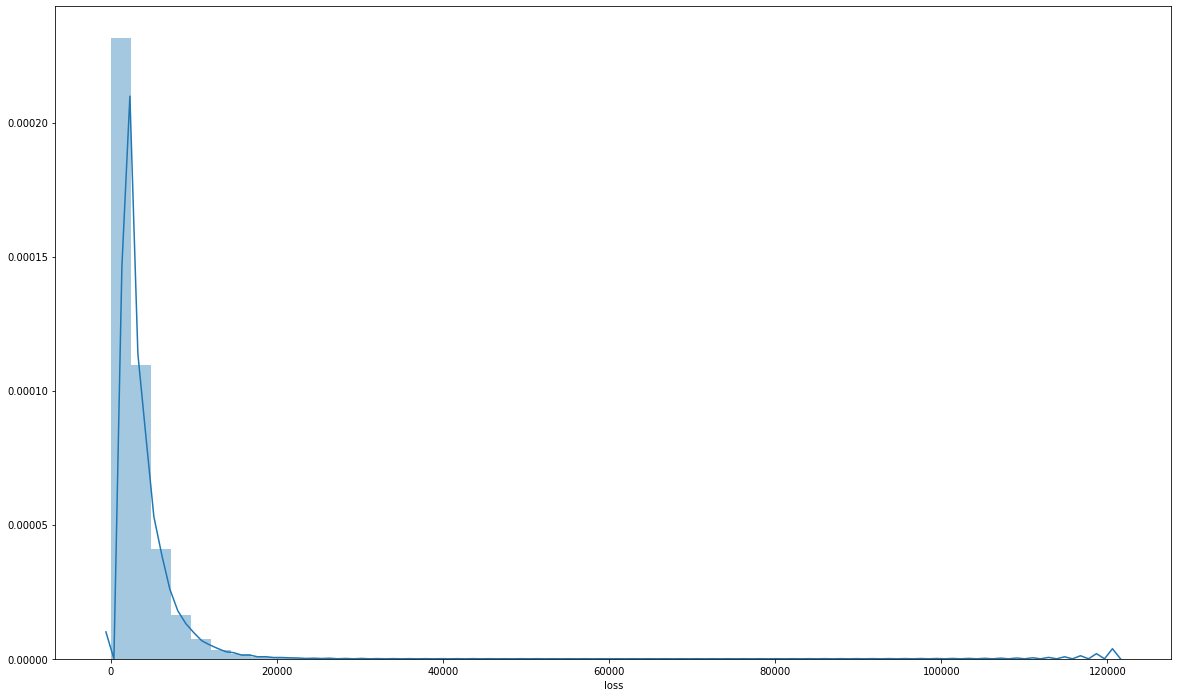

In [18]:
# Plot the 'loss' column.
plt.figure(figsize=(20, 12))
sns.distplot(data_train['loss'])

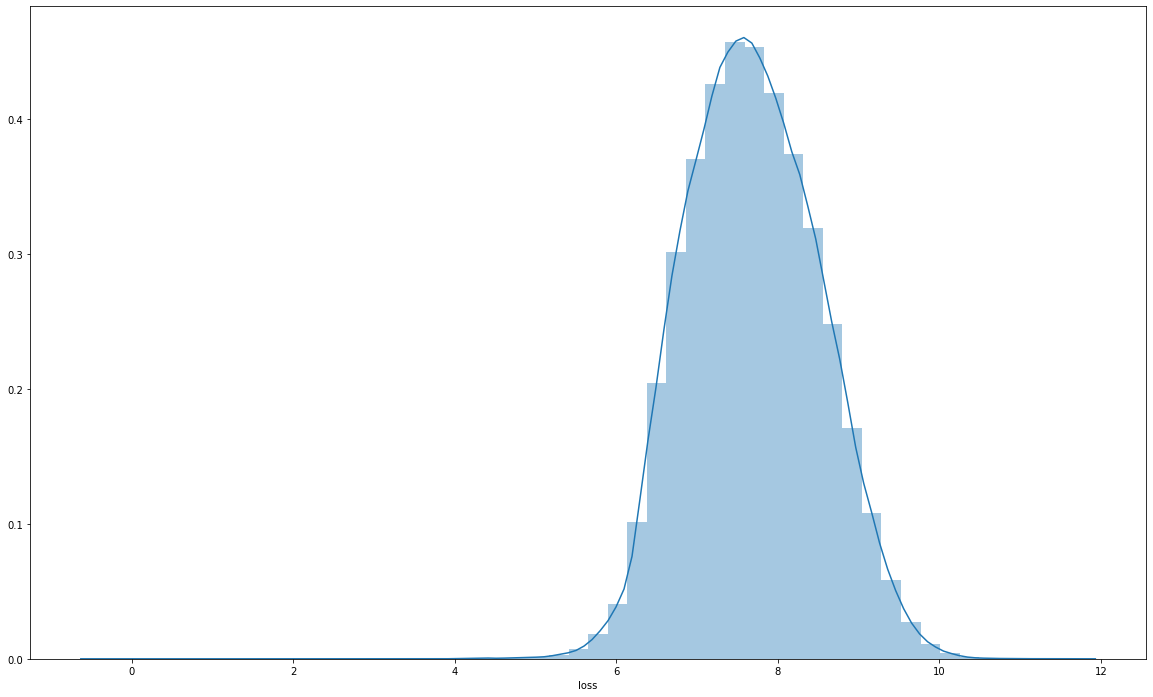

In [19]:
# Plot the 'loss' column logarithmic.
plt.figure(figsize=(20, 12))
sns.distplot(np.log(data_train['loss']))

In [20]:
# This is not a necessary step.
# Adding a column to data_train and attribute a 'true' value to it.
data_train['is_train'] = True

In [21]:
# This is not a necessary step.
# Adding a column to data_test and attribute a 'false' value to it.
data_test['is_train'] = False

In [22]:
# Read the first lines of the new train data.
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,is_train
0,1,A,B,A,B,A,A,A,A,B,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,True
1,2,A,B,A,A,A,A,A,A,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,True
2,5,A,B,A,A,B,A,A,A,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,True
3,10,B,B,A,B,A,A,A,A,B,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,True
4,11,A,B,A,B,A,A,A,A,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,True


In [23]:
# Read the first lines of the new test data.
data_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,is_train
0,4,A,B,A,A,A,A,A,A,B,...,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,False
1,6,A,B,A,B,A,A,A,A,B,...,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,False
2,9,A,B,A,B,B,A,B,A,B,...,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,False
3,12,A,A,A,A,B,A,A,A,A,...,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,False
4,15,B,A,A,A,A,B,A,A,A,...,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,False


In [24]:
# This is not a necessary step.
# Concat the two data sets into one data set.
data_train_test = pd.concat([data_train, data_test], axis=0)

In [25]:
# Read the first lines of the new data set.
data_train_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,is_train
0,1,A,B,A,B,A,A,A,A,B,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,True
1,2,A,B,A,A,A,A,A,A,B,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,True
2,5,A,B,A,A,B,A,A,A,B,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,True
3,10,B,B,A,B,A,A,A,A,B,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,True
4,11,A,B,A,B,A,A,A,A,B,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,True


In [26]:
# Prepare the train data for regression using catboost.
# We need to execute some modification concerning column names.
# Let's look at the column names.
data_train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'cont14', 'loss', 'is_train'],
      dtype='object', length=133)

In [27]:
# As it was shown, generally we have two type of column:
# 1) cat, that is an abbreviation of 'categorical',
# 2) cont, that is an abbreviation of 'continuous'.
# So the data set's values have two general types: categorical and continouos.
# In order to give our data to catboost algorithm, we should seperate them.
# Furthermore, we must only give the column indexes to this algorithm.
# Considering this goal, we should use 'Regular Experssion (re)' pattern matching.
import re

In [28]:
# Specify our pattern for categorical column names.
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")

In [29]:
# Specify our pattern for continuous column names.
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")

In [30]:
# Devide the categorical column names.
cat_column = [cat for cat in data_train.columns if 'cat' in cat]

In [31]:
# Print the categorical column names.
cat_column

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [32]:
# Although the categorical column names are sorted, we should force it to be sorted.
cat_column = sorted(cat_column, key=lambda s: int(s[3:]))

In [33]:
# Print the categorical column names.
cat_column

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [34]:
# list the index of the categorical column names using the regual expression pattern matching the we previously compiled.
cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]
cat_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

In [35]:
# Devide the continuous column names.
cont_column = [cont for cont in data_train.columns if 'cont' in cont]

In [36]:
# Print the continuous column names.
cont_column

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [37]:
# Although the continuous column names are sorted, we should force it to be sorted.
cont_column = sorted(cont_column, key=lambda s: int(s[4:]))

In [38]:
# Print the continuous column names.
cont_column

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [39]:
# list the index of the continuous column names using the regual expression pattern matching the we previously compiled.
cont_index = [i for i in range(0, len(data_train.columns)) if cont_pattern.match(data_train.columns[i])]
cont_index

[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]

In [40]:
# Prepare train and test datasets.
# In order to do that, we can use a specific package in Sci-Kit library.
from sklearn.model_selection import train_test_split

In [41]:
# Specify the inputs (X) and the target (y).
# The input data is the data set whithout these specific columns: 'id', 'loss', 'isTrain'.
# the target data is the logarithm of the 'loss' column.
X = data_train.drop(['id', 'loss', 'is_train'], axis=1)
y = np.log(data_train['loss'])

In [42]:
# Specify the train and test inputs and targets.
# Note that we specify the random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [43]:
# Use catboost algorithm for regression.
from catboost import CatBoostRegressor

In [44]:
# Create a new catboost.
catboost_regressor = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10)

In [45]:
# For sake of the RAM capacity, we should delete the unncessary data sets from RAM.
del X
del y
del data_train
del data_test
del data_train_test

In [ ]:
# Learn from the data.
# Specify the categorical columns with the following command:
# np.asarray(cat_index) - 1.
# In addition, we declare the test data with setting the 'eval_set' parameter.
catboost_regressor.fit(X_train, y_train, np.asarray(cat_index) - 1, eval_set=(X_test, y_test))

In [ ]:
# For further usage and reducing RAM occupation, Save the medel into the Hard Disk.
# In order to achive this goal, use 'pickle'.
import pickle

In [ ]:
# Use'Write Byte (wr)'' mode.
# First open a file named catboost_regression,
# Then pickle dumps the model, i.e. catboost_regressor, into it.
with open('catboost_regression', 'wb') as file:
    pickle.dump(catboost_regressor, file)